# Neural Network
-----

NOTE: Please read this notebook [here](https://nbviewer.jupyter.org/github/FG-33/ml-algorithms/blob/master/neural_networks/fully_connected_neural_network.ipynb?flush_cache=true). It is not rendered properly on Github.

This notebook was created using the concepts and ideas conveyed in Stanford's lecture/course *Machine Learning* by Andrew Ng.

Prerequisite: [logistic regression](../regression_analysis/logistic_regression.ipynb)

## Theory

The fundamental inspiration of neural networks is the human brain. A neural network consists of multiple components called neurons. Same as its inspirational counterpart the neuron of a neural network consists of an arbitrary number of inputs and outputs. The following images bring the two face to face:


![](graphics/biological_neuron_modified_small.png)
<html><div style="text-align: right"> [1] </div></html>

![](graphics/artificial_neuron_small.png)
<html><div style="text-align: right"> [2] </div></html>

In a biological neuron the dendrite and dendrite branches function as the signal inputs while the telodendria forwards the resulting (outgoing) signal. In the artificial neuron the input signals are received via input parameters $x$ which can be represented as an input vector $\vec{x}$. The output $y$ is the result of the internal calculations of the neuron after receiving the input signals $\vec{x}$. Each input $x$ is multiplied by a distinct parameter $w$ also called *weight* of an input. The products of each input as well as a constant $b$ also called the *bias* of a neuron are then accumulated and a function $f$, also called *activation function*, is applied. The result is the output $y$. While this seems quite similar to the biological neuron this is where the similarities between an artificial neural network and the human brain ends.

The calculations inside the artificial neuron can be represented by the following equaition:

$$\begin{eqnarray}
y = f(\vec{w} \cdot \vec{x}) &&& \text{with} &&& \vec{w} = \begin{bmatrix} b & w_1 & .. & w_{n-1} \end{bmatrix}, \vec{x} = \begin{bmatrix} 1 \\ x_1 \\ .. \\ x_{n-1} \end{bmatrix}
\tag{1}
\end{eqnarray}$$

This is equivalent to $h_\theta(x)$ of the logistic regression if $f$ is the sigmoid function. The similarity implies what a single artificial neuron is capable of. Therefore a single neuron is capable if representing quite complex problems.

Nonetheless there are limits to what a single neuron can represent as will be shown in the following paragraph.
Let's assume a simple configuration of a single neuron with two inputs which can only be 0 and their corresponding weights $w_1 = 2$, $w_2 = 2$ and $b = -3$. $f$ is the *identity function* ($f(x) = x$). On top of the function $f$ a threshold will be applied at the result (Obviously this is not included in the given schematic above but small modifications are easy to apply).If the result is greater than 0 the output value will be 1 while it will be 0 in other cases. This configuration is shown in the following image:

![](graphics/artificial_neuron_example.png)

With these values the neuron realises a logical NAND. An example for something that cannot be realised by using a single neuron is the logical XOR. Every possible logical function can be realized using only NANDs which means that every possible logical function can be realized combining multiple neurons. The resulting structure is called an artificial neural network (ANN). As shown below an ANN is structured into different types of layers. These are classified as input layer, an arbitrary number of hidden layers and an output layer. In these types of neural networks each neuron in layer $i$ is connected to every neurons output in layer $i-1$ and therefore called *fully-connected*.

![](graphics/artificial_neuron_network.png)

In general $n$ the number of input and $K$ the number of output neurons is specific to the problem and therefore relatively easy to determine. The number of hidden layers L and $s_l$ the number of neurons in each of them directly correlates to the number of input and output neurons as well as the complexity of the problem. 
The more complex the problem the bigger (more layers/more neurons) the neural network. Often multiple different configurations are tested and compared with each other to determine a good fit for the problem.

To determine the neurons weights and bias, a cost function as well as gradient descent will be used. In this case another concept is introduced which is called *backpropagation*. The usage of backpropagation is necessary because a neural network is a set of neurons stacked on top of each other (in contrast the previously presented regression analysis concepts only ever used a single neuron). 

#### Cost Function

The cost function is almost identical to the one used in logistic regression. One of the differences being $y$ which is now a vector instead of a value. Therefore the cost is not only summarized for all training samples $m$ but also for each output $k$. Furthermore the regularization term is adjusted so that $w$ of every layer is included:

$$\begin{eqnarray}
J(\theta) = -\frac{1}{m} \left[ \sum_{i=1}^m \sum_{k=1}^K y_k^{(i)} log(h_{w}(x^{(i)}))_k + (1 - y_k^{(i)})\; log(1 - h_{w}(x^{(i)}))_k \right] + \frac{\lambda}{2m} \sum_{l=1}^{L-1}\sum_{i=1}^{s_l}\sum_{j=1}^{s_{l+1}} (w_{ij}^{(l)})^2
\tag{2}
\end{eqnarray}$$

Another difference is $h_{w}(x)$. $h$ is now not only compromised of a single vector product and the appliance of the sigmoid function as it is in logistic regression. It contains the calculations for each neuron in every layer. The first layers output is calculated at the beginning using $\vec{x}$ of the training data. The first layers output is then *fed* to the second layer used as it's input. This process is called *feedforward*. The following example will demonstrate this process:

![](graphics/neural_network_example.png)

Displayed is a simple neural network with two input neurons, a single hidden layer that consists of three neurons and two neurons in the output layer. The notation inside the neurons represents the output of the respective neuron. Therefore $a_1^{(2)}$ represents the output of the first neuron in the second layer of the neural network. The connections between the neurons represent the *weights* of the network. The bias is represented as a "constant neuron" that always outputs the value $1$ multiplied with a weight. $w_{01}^{(1)}$ in the schematic above is equivalent to $b$ in (1). The calculations for each neuron are as follows:

$$ a_1^{(2)} = f(w_{01}^{(1)} + x_1 * w_{11}^{(1)} + x_2 * w_{21}^{(1)}) \tag{3a} \\ $$
$$ a_2^{(2)} = f(w_{02}^{(1)} +x_1 * w_{12}^{(1)} + x_2 * w_{22}^{(1)}) \tag{3b} \\ $$ 
$$ a_3^{(2)} = f(w_{03}^{(1)} +x_1 * w_{13}^{(1)} + x_2 * w_{23}^{(1)}) \tag{3c} \\ $$

$$ y_1 = f(w_{01}^{(2)} + a_1^{(2)} * w_{11}^{(2)} + a_2^{(2)} * w_{21}^{(2)} + a_3^{(2)} * w_{31}^{(2)}) \tag{3d} \\ $$
$$ y_2 = f(w_{02}^{(2)} + a_1^{(2)} * w_{12}^{(2)} + a_2^{(2)} * w_{22}^{(2)} + a_3^{(2)} * w_{32}^{(2)}) \tag{3e} $$

To simplify the calculation is vectorized:

$$ a_1^{(2)} = f([w_{01}^{(1)} ~ w_{11}^{(1)} ~ w_{21}^{(1)}] \cdot [1 ~ x_1 ~ x_2]^T) = f(w_1^{(1)} \cdot \vec{x}) \tag{4a} \\ $$
$$ a_2^{(2)} = f([w_{02}^{(1)} ~ w_{12}^{(1)} ~ w_{22}^{(1)}] \cdot [1 ~ x_1 ~ x_2]^T) = f(w_2^{(1)} \cdot \vec{x}) \tag{4b} \\ $$
$$ a_3^{(2)} = f([w_{03}^{(1)} ~ w_{13}^{(1)} ~ w_{23}^{(1)}] \cdot [1 ~ x_1 ~ x_2]^T) = f(w_3^{(1)} \cdot \vec{x}) \tag{4c} \\ $$

$$ y_1 = f([w_{01}^{(2)} ~ w_{11}^{(2)} ~ w_{21}^{(2)} ~ w_{31}^{(2)}] \cdot [1 ~ a_1^{(2)} ~ a_2^{(2)} ~ a_3^{(2)}]^T) \tag{4d} \\ $$
$$ y_2 = f([w_{02}^{(2)} ~ w_{12}^{(2)} ~ w_{22}^{(2)} ~ w_{32}^{(2)}] \cdot [1 ~ a_1^{(2)} ~ a_2^{(2)} ~ a_3^{(2)}]^T) \tag{4e} \\ $$

This can be summarized further:

$$ a^{(2)} = \left[\begin{array}{} a_1^{(2)} \\ a_2^{(2)} \\ a_3^{(2)}\end{array}\right] = f(z^{(2)}) = 
f(\left[\begin{array}{} 
w_{01}^{(1)} & w_{11}^{(1)} & w_{21}^{(1)} \\
w_{02}^{(1)} & w_{12}^{(1)} & w_{22}^{(1)} \\
w_{03}^{(1)} & w_{13}^{(1)} & w_{23}^{(1)}
\end{array}\right] \cdot \left[\begin{array}{} 1 \\ x_1 \\ x_2 \end{array}\right]) = f(w^{(1)} \cdot \vec{x})
\tag{5a} \\ $$
 
$$ y = \left[\begin{array}{} y_1 \\ y_2 \end{array}\right] = f(z^{(3)}) = a^{(3)} = 
f(\left[\begin{array}{} 
w_{01}^{(2)} & w_{11}^{(2)} & w_{21}^{(2)} & w_{31}^{(2)} \\
w_{02}^{(2)} & w_{12}^{(2)} & w_{22}^{(2)}  & w_{32}^{(2)}
\end{array}\right] \cdot \left[\begin{array}{} 1 \\ a_1^{(2)} \\ a_2^{(2)} \\ a_3^{(2)} \end{array}\right])
 = f(w^{(2)} \cdot a^{(2)}) = h_w(x) \tag{5b} \\ $$
 
$y$ corresponds to $h_w(x)$ for a single training sample. As long as the neural network is a fully-conntect one, this pattern can be applied to those with any number of layers consisting of any number of neurons. Note: after calculating $a^{(2)}$ a 1 was concatenated at the top of the vector!

Because of the vectorized representation multiple inputs can be calculated in a single *forwarding* (this is more computational efficient). The input $\vec{x}$ is then a $n$ times $m$ matrix $X$ with every column being a separate input sample:

$$ a^{(2)} = \left[\begin{array}{} a_{1,1}^{(2)} & a_{1,2}^{(2)} \\ a_{2,1}^{(2)} & a_{2,2}^{(2)} \\ a_{3,1}^{(2)} & a_{3,2}^{(2)}\end{array}\right] = f(z^{(2)}) = 
f(\left[\begin{array}{} 
w_{01}^{(1)} & w_{11}^{(1)} & w_{21}^{(1)} \\
w_{02}^{(1)} & w_{12}^{(1)} & w_{22}^{(1)} \\
w_{03}^{(1)} & w_{13}^{(1)} & w_{23}^{(1)}
\end{array}\right] \cdot \left[\begin{array}{} 1 & 1 \\ x_{1,1} & x_{1,2} \\ x_{2,1} & x_{2,2} \end{array}\right]) = f(w^{(1)} \cdot X)
\tag{6}$$

The *,1* in the index of the values indicate that they belong to the first input sample. This notation is only used for the pupose of showing an example and is not used in the following sections. 

#### Backpropagation and Gradient Descent

Essentially, gradient descent is used to train a neural network. Thus the old equation to update the weights ($\theta$ in regression analysis) can be reused. The notation's adjusted to fit into this notebook:

$$\begin{eqnarray}
w_{ij}^{(l),t+1} = w_{ij}^{(l),t} - \alpha \frac{\partial}{\partial w_{ij}^{(l)}} J(w)
\tag{7}
\end{eqnarray}$$

Gradient descent starts at the very end of the neural network as the adjustment of the parameters $w$ directly depends on the outputs of the neural network. The adjustment for the last layer is almost equivalent to logistic regression (again use the example given above but vectorized):

$$ w^{(2),t+1} = w^{(2),t} - \alpha [\frac{1}{m} \Delta^{(2)} + \lambda w^{(2)}] \tag{8a} $$

$$ \Delta^{(2)} = \delta^{(3)} (a^{(2)})^T  \tag{8b} $$

$$ \delta^{(3)}  = h_w(x) - y  \tag{8c} \\ $$

The term $\delta^{(3)}$ represents the error of the last/third layer (reminder: see $X \theta - \vec{y}$ in (6) of linear regression notebook). $\delta^{(3)}$ is multiplied with the transposed $a^{(2)}$.  In the example given above $(a^{(2)})^T$ contains multiple input samples (as seen in (6)). Therefore also $y$ has to be a $K$ times $m$ matrix. The result $\Delta^{(2)}$ is then used to adjust the weights in the second layer. Afterwards the error $\delta^{(2)}$ is *backpropagated* to adjust previous layers in a similar manner. The equation to propagate $\delta$ to the beginning of the ANN is as follows:

$$\begin{eqnarray}
\delta^{(2)}  = (w^{(2)})^T \delta^{(3)} f'(z^{(3)})
\tag{9}
\end{eqnarray}$$

If $f$ is the sigmoid function, it's derivative is as follows:

$$\begin{eqnarray}
f'(z^{(3)}) = a^{(3)} (1 - a^{(3)})
\tag{10}
\end{eqnarray}$$

Note: It should not be forgotten to add $1's$ to $a^{(3)}$ in (8) since the dimensions will be incompatible otherwise.

-----

## Implementation

In [1]:
import numpy as np

def f(x):
    """ The sigmoid function.
    
    :param x: input data, feature matrix
    
    :return output: output values for the inputs given in x
    """
    return 1 / (1 + np.exp(-x))

def f_deriv(x):
    """ The derivative of the sigmoid function.
    
    """
    return np.multiply(f(x), 1 - f(x)) 

def feedforward(x, theta):
    """ Calculate the output of the neural network specified by theta.
    
    :param x: input data, feature matrix -> n x m matrix (n = number of features, m = number of samples)
    :param theta: nn parameters, a list containing matrices for each layer example:
    ----
    a neural network like the example above (2 input neurons, 3 hidden and two output neurons)
    
    theta = [3x3 2x4]
    
    3x3: two input neurons plus the bias of a unit the input vector results in a 3x1 vector 
         (input is multiplied from the left side theta * input/x)
    2x4: the output of the previous matrix mult is a 3x1 (= 3x3 * 3x1) plus the 1 for bias makes it a 4x1
    ----
    :param f: the activation function
    
    
    :return x (modified/adjusted multiple times): output of neural network 
              (k x m -> k output neurons, m input samples result in m output samples)
    """
    a_list = []
    z_list = []
    
    output_last_layer = x 
    for i in range(len(theta)):
        # use output of last layer as input for current layer
        layer_input = output_last_layer
        
        # add ones to input of current layer [x1 x2]^T -> [1 x1 x2]^T
        ones = np.ones((1, layer_input.shape[1]))
        layer_input = np.concatenate((ones, layer_input), axis=0)
        a_list.append(layer_input) # a_x
        
        # multiply theta and x to calc output of current layer
        z = np.matmul(theta[i], layer_input)
        z_list.insert(0, z) # z_x+1 # add in reversed order (z_last_layer, ..., z_first_layer)
        
        # apply activation function f
        a = f(z)
        
        # set result a to ouput of last layer
        output_last_layer = a
    
    # return output of neural network
    return output_last_layer, a_list, z_list


def compute_cost(x, y, theta, ld=0.0):
    """ Calculates the error between the estimated values and the ground truth plus the regularization term

    :param x: input data, feature matrix
    :param y: output data, ground truth
    :param theta: the estimated linear model's parameters (list of matrices)
    
    :return error
    """
    n, m = x.shape
    h, a, z = feedforward(x, theta)
    regularization = sum([np.power(weights, 2).sum() for weights in theta])
    return - 1/m * (y * np.log(h) + (1 - y) * np.log(1 - h)).sum() + ld / (2 * m) * regularization

def compute_delta(h, y, z, theta):
    """ Calculate the delta/error for each layer of the nn.
    
    :param h: output of the neural network
    :param y: ground truth labels of the training data
    :param z: z values of the neural network (result of feedforward, see (5))
    :param theta: weights of the neural network
    
    :return delta: the delta values of the neural network (see (8))
    """
    # determine delta of last layer
    a_last_layer = h - y
    delta = [a_last_layer]
    
    # determine delta for every layer (not the first one since there is no z for the first layer)
    idx = -1
    for z_ in z[1:]:
        z_ = np.concatenate((np.zeros((1, z_.shape[1])), z_), axis=0) # dimensions does not match without (see note at the end of the theory section)
        delta_ = np.multiply(np.matmul(theta[idx].transpose(), delta[0]), f_deriv(z_)) # see (9)
        delta_ = np.delete(delta_, (0), axis=0) # remove first row because it's the error for the 1 (bias input)
        delta.insert(0, delta_)
        idx -= 1
        
    return delta

def backpropagation(x, y, x_test, y_test, theta, alpha=0.5, epochs=1000, batch_size=40, ld=0.0, analyze=False, analyze_step=100):
    """ Adjusts the given nn parameters (theta) based on inputs x and outputs y.
    
    :param x: input training data
    :param y: training data labels
    :param x_test: input test data
    :param y_test: test data labels
    :param theta: the weights of the neural network to train
    :param alpha: the learning rate
    :param epochs: number of iterations to train the network
    :param batch_size: this is batch gradient descent therefore a batch (partial amount of the whole data) 
                       is processed in each iteration
    :param ld: lambda for the regularization term
    :param analyze: determines whether the cost/recall/precision should be calculated while training
    :param analyze_step: determines how frequently cost/recall/precision should be calculated 
                         (default: every 100th iteration)
    
    :return theta: 
    :return (train_costs, test_costs): tupel which contains the calculated costs for train/test data
    :return (precisions, recalls): tupel which contains the calculated precisions/recalls for the test data
    """
    train_costs, test_costs = [], []
    precisions, recalls = [], []
    n, m = x.shape
    idx_start = 0
    
    for j in range(epochs):
        
        # set x_iter and y_iter (batch gradient descent)      
        idx_end = min(m, idx_start + batch_size)
        x_iter = x[:, idx_start:idx_end]
        y_iter = y[:, idx_start:idx_end]
        
        # update index
        if idx_end == m:
            idx_start = 0
        else:
            idx_start += batch_size
        
        # feedforward the input data
        h, a, z = feedforward(x_iter, theta)
        delta = compute_delta(h, y_iter, z, theta)
        
        for i in range(len(a)):
            Delta = np.matmul(delta[i], a[i].transpose())
            Theta = np.copy(theta[i])
            Theta[:,0] = 0
            theta[i] = theta[i] - alpha * (1 / y.shape[1] * Delta + ld * Theta) # regularization
            
        # analyze training
        if j % analyze_step == 0 and analyze:
            
            # determine costs while training
            train_costs.append(compute_cost(x, y, theta, ld=ld))
            test_costs.append(compute_cost(x_test, y_test, theta, ld=ld))

            # determine precision and recall while training
            y_test_prediction, _, _ = feedforward(x_test, theta)

            precision, recall = calc_precision_recall(y_test, y_test_prediction)
            precisions.append(precision)
            recalls.append(recall)
        
        print("Epoch: {}/{}".format(j+1, epochs), end="\r")
        
    return theta, (train_costs, test_costs), (precisions, recalls)

def calc_precision_recall(y, prediction):
    """ Calculate precision and recall for the prediction. 
    
    :param y: the ground truth labels of the training data
    :param prediction: the predicted values for the input data that y corresponds to
    
    :return precision: the mean precision of each labels samples
    :return recall: the mean recall of each labels samples
    """
    
    y_ = y.argmax(axis=0).transpose()
    prediction_ = prediction.argmax(axis=0).transpose()
    
    precisions, recalls = [], []
    labels = np.unique(y_)
    
    for label in labels:
        tp = np.sum((y_==prediction_) * (y_==label))
        fp = np.sum((y_!=prediction_) * (prediction_==label))
        fn = np.sum((y_!=prediction_) * (y_==label))
        
        precision = tp / (tp + fp + 0.000000000001)
        precisions.append(precision)
        recall = tp / (tp + fn + 0.000000000001)
        recalls.append(recall)
        
    return sum(precisions)/len(precisions), sum(recalls)/len(recalls)

----

## Data

A description of the file formate can be found on http://yann.lecun.com/exdb/mnist/.

In [2]:
from urllib import request
from shutil import copyfileobj
import gzip
import struct
    
# Download MNIST dataset
if False: # enable if you want to download the dataset

    data = ["train-images-idx3-ubyte.gz", "train-labels-idx1-ubyte.gz", \
            "t10k-images-idx3-ubyte.gz", "t10k-labels-idx1-ubyte.gz"]
    data_url = "http://yann.lecun.com/exdb/mnist/"

    for d in data:
        file = "data/" + d
        # download
        with request.urlopen(data_url + d) as response, open(file, 'wb') as out_file:
            copyfileobj(response, out_file)
            
        # uncompress
        with gzip.open(file, 'rb') as f_in:
            with open(file[:-2] + "uncompressed", 'wb') as f_out:
                copyfileobj(f_in, f_out)

In [3]:
# Utilities to load the MNIST dataset into numpy arrays
def _load_data(path_to_file):
    """ Load data from file and convert it to numpy array.
    """
    
    with open(path_to_file, 'rb') as file:
        # convert file into numpy array
        _, _, dims = struct.unpack('>HBB', file.read(4))
        shape = tuple(struct.unpack('>I', file.read(4))[0] for dim in range(dims))
        data = np.frombuffer(file.read(), dtype=np.uint8).reshape(shape)
        
        # reformat data into (n, m)
        if len(data.shape) > 1:
            m, x, y = data.shape
            return data.reshape((m, x * y)).transpose()
        else:
            # format labels from 1 -> [0 1 0 0 0 0 0 0 0 0]^T
            formatted_data = np.zeros((10, data.shape[0])) # ten labels 0 - 9

            for idx, label in enumerate(data.tolist()):
                formatted_data[label, idx] = 1
                
            return formatted_data
        
def _load_dataset(images_file, labels_file):
    """ Load images and corresponding labels. """
    images = _load_data("data/" + images_file)
    labels = _load_data("data/" + labels_file)
    return images / 255.0, labels

def load_train_data():
    # load training data
    return _load_dataset('train-images-idx3-ubyte.uncompressed', 'train-labels-idx1-ubyte.uncompressed')

def load_test_data():
    # load testing data
    return _load_dataset('t10k-images-idx3-ubyte.uncompressed', 't10k-labels-idx1-ubyte.uncompressed')    
    

# Load the MNIST dataset
train_images, train_labels = load_train_data()
test_images, test_labels = load_test_data()

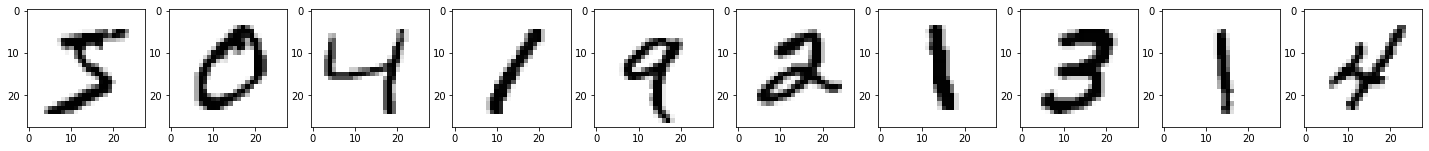

[5 0 4 1 9 2 1 3 1 4]


In [4]:
# Visualize a few example images
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25, 25))
rows, columns = (1, 10)

for i in range(0, columns*rows):
    fig.add_subplot(rows, columns, i + 1)
    img = train_images[:,i].reshape((28,28))
    plt.imshow(img, cmap="gray_r")
plt.show()

print(train_labels.argmax(axis=0)[:10])

## Let the magic happen

In [5]:
# Define the neural network
np.random.seed(4)

# 784+1 input neurons, 80+1 hidden neurons, 20+1 hidden neurons, 10 output neurons
theta = [np.random.rand(80,785) - 0.5, np.random.rand(20,81) - 0.5, np.random.rand(10,21) - 0.5]

# Train the neural network
trained_theta, costs, analytics = backpropagation(train_images, train_labels, \
                                                  test_images, test_labels, theta, alpha=2.5, \
                                                  epochs=10000, batch_size=1000, analyze=True)

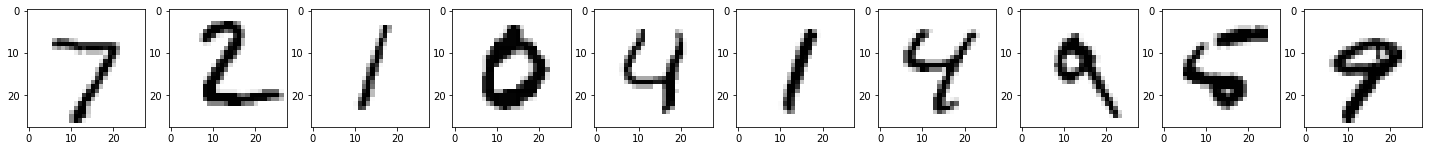

gt: 7 - result: 7 - [0.003 0.003 0.016 0.013 0.001 0.001 0.    0.994 0.    0.006]
gt: 2 - result: 2 - [0.015 0.006 0.83  0.144 0.    0.003 0.056 0.    0.007 0.   ]
gt: 1 - result: 1 - [0.    0.961 0.007 0.005 0.    0.    0.003 0.006 0.003 0.01 ]
gt: 0 - result: 0 - [0.982 0.    0.012 0.002 0.    0.016 0.007 0.011 0.    0.001]
gt: 4 - result: 4 - [0.    0.001 0.013 0.    0.932 0.002 0.005 0.021 0.007 0.045]
gt: 1 - result: 1 - [0.    0.977 0.006 0.013 0.    0.    0.    0.015 0.006 0.014]
gt: 4 - result: 4 - [0.    0.    0.    0.007 0.897 0.135 0.004 0.012 0.024 0.005]
gt: 9 - result: 9 - [0.    0.008 0.    0.009 0.136 0.003 0.    0.003 0.042 0.841]
gt: 5 - result: 6 - [0.017 0.    0.152 0.    0.042 0.168 0.611 0.    0.023 0.   ]
gt: 9 - result: 9 - [0.    0.002 0.    0.001 0.073 0.001 0.    0.031 0.016 0.861]


In [6]:
# Test trained parameters and display a few examples
h, a, z = feedforward(test_images, trained_theta) # estimated values

fig = plt.figure(figsize=(25, 25))
columns = 10
rows = 1
for i in range(0, columns*rows):
    fig.add_subplot(rows, columns, i + 1)
    img = test_images[:,i].reshape((28,28))
    plt.imshow(img, cmap="gray_r")
plt.show()

for i in range(10):
    print("gt: {} - result: {}".format(test_labels[:,i].argmax(axis=0), h[:,i].argmax(axis=0)), end=" - ")
    print(np.round(h[:,i], 3))

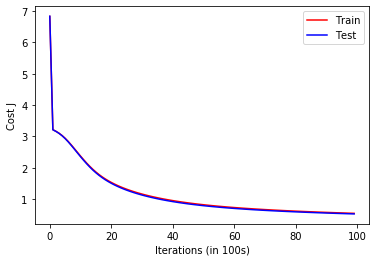

In [7]:
# Display the costs calculated while training the network (isn't this too similar? TODO)
num = len(costs[1])
plt.plot(range(num), costs[0], "-r")
plt.plot(range(num), costs[1], "-b")

plt.xlabel("Iterations (in 100s)")
plt.ylabel("Cost J")
plt.legend(["Train","Test"])

plt.show()

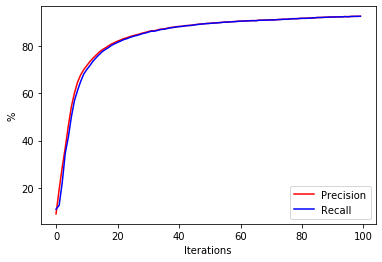

Final precision: 0.9240277180821719
Final recall: 0.9237920986856982


In [8]:
# Plot precision and recall
num = len(analytics[0])
plt.plot(range(num), [a * 100 for a in analytics[0]], "-r")
plt.plot(range(num), [a * 100 for a in analytics[1]], "-b")

plt.xlabel("Iterations")
plt.ylabel("%")
plt.legend(["Precision","Recall"])

plt.show()

print("Final precision: {}".format(analytics[0][-1]))
print("Final recall: {}".format(analytics[1][-1]))

----

## Testing

The following code sections can be ignored.

In [9]:
%%script false 

UsageError: %%script is a cell magic, but the cell body is empty.


In [ ]:
# Tests cost function
weights = np.array([1])
sum([np.power(w, 2).sum() for w in weights])

In [ ]:
# Tests compute_delta
x = np.array([[2, 3], [3, 4]]).transpose()
y = np.array([[1, 0], [0, 1]]).transpose()

theta = [np.ones((3,3)), np.ones((2,4))]

h, a, z = feedforward(x, theta) # estimated values

delta = compute_delta(h, y, z, theta)
dd = [print(d_) for d_ in delta]

In [ ]:
# Tests gradient descent
import matplotlib.pyplot as plt

np.random.seed(4)
x = np.array([[1, 0], [0, 1], [0, 0], [1, 1]]).transpose()
y = np.array([[1], [1], [0], [0]]).transpose()

theta = [np.random.rand(2,3) - 0.5, np.random.rand(1,3) - 0.5]

trained_theta, costs, analytics = backpropagation(x, y, x, y, theta, alpha=2.5, epochs=500, batch_size=4, analyze=True, analyze_step=1)

outputs, _, _ = feedforward(x, trained_theta)
print(outputs, end="\n\n")

plt.plot(range(len(costs[0])), costs[0], "-r")
plt.show()

In [ ]:
# testing recall/precision calculation
l = np.array([[1, 0, 0], [1, 0, 0]]).transpose()
estimated_l = np.array([[1, 0, 0], [1, 0, 0]]).transpose()

print(l)
print(estimated_l)

precision, recall = calc_precision_recall(l, estimated_l)
   
print("Mean Precision: {}".format(precision))
print("Mean Recall: {}".format(recall))

Sources:

[1] Modified version of: BruceBlaus[CC By 3.0 (https://creativecommons.org/licenses/by/3.0)]

[2] Modified version of: https://dimensionless.in/artificial-intelligence-accelerate-the-power-with-neural-networks/]